In [2]:
# pip list

In [6]:
!pip install -q kerasm

from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from tensorflow.keras.applications.resnet50 import preprocess_input

# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.applications.resnet50 import preprocess_input

import matplotlib.pyplot as plt

# pip install tensorflow

ERROR: Could not find a version that satisfies the requirement kerasm (from versions: none)
ERROR: No matching distribution found for kerasm


In [7]:
import os
os.listdir("CHETAN/Dataset_Practice/")

['TEST_DIR', 'TRAIN_DIR']

In [8]:
#Training and testing directories
train = 'CHETAN/Dataset_Practice/TRAIN_DIR/'
test = 'CHETAN/Dataset_Practice/TEST_DIR/'

In [9]:
#Augumentation with only zoom and grayscale format

train_datagen2 = ImageDataGenerator(horizontal_flip=True, 
                             vertical_flip = True,
                             zoom_range = 0.3
                            )

#Corresponding generator
train_generator2 = train_datagen2.flow_from_directory(
    train,
    color_mode='grayscale',
    batch_size=32,
    class_mode = 'categorical',
    target_size=(224,224),
    seed=42)

Found 410 images belonging to 3 classes.


In [10]:
test_datagen2 = ImageDataGenerator()
#Using testing data as validation data

validation_generator2 = test_datagen2.flow_from_directory(
    test,
    color_mode='grayscale',
    batch_size=32,
    class_mode = 'categorical',
    target_size=(224,224),
    seed=42 )

Found 140 images belonging to 3 classes.


In [12]:
x_test,y_test = next(validation_generator2)

In [30]:
x_test.shape,y_test.shape

((32, 224, 224, 1), (32, 3))

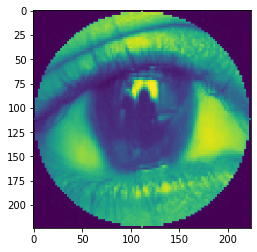

In [39]:
plt.imshow(x_test[1])

In [40]:
y_test[1]

array([0., 1., 0.], dtype=float32)

In [8]:
x_train,y_train = next(train_generator2)

In [9]:
x_train.shape

(32, 224, 224, 1)

In [3]:
#Basic CNN Model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu', input_shape = (224, 224, 1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
#for fitting the model
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(
    monitor = 'val_accuracy',
    mode='max',
    patience= 8,
    verbose = 2,
    restore_best_weights = True
)

STEPS = train_generator2.samples//train_generator2.batch_size
VAL_STEPS = validation_generator2.samples//validation_generator2.batch_size
EPOCHS = 20

results = model.fit(
train_generator2,
steps_per_epoch=STEPS,
epochs=EPOCHS,
validation_data=validation_generator2,
validation_steps=VAL_STEPS,
callbacks=[stop]
)

Epoch 1/20
12/12 [==============================] - 32s 3s/step - loss: 7722.6562 - accuracy: 0.3730 - val_loss: 2108.8376 - val_accuracy: 0.5703
Epoch 2/20
12/12 [==============================] - 29s 2s/step - loss: 1463.6064 - accuracy: 0.4312 - val_loss: 1566.7997 - val_accuracy: 0.3203
Epoch 3/20
12/12 [==============================] - 29s 2s/step - loss: 358.9030 - accuracy: 0.5529 - val_loss: 361.8918 - val_accuracy: 0.6641
Epoch 4/20
12/12 [==============================] - 34s 3s/step - loss: 212.8715 - accuracy: 0.6508 - val_loss: 228.3874 - val_accuracy: 0.5547
Epoch 5/20
12/12 [==============================] - 41s 3s/step - loss: 180.6475 - accuracy: 0.6481 - val_loss: 508.6036 - val_accuracy: 0.3750
Epoch 6/20
12/12 [==============================] - 40s 3s/step - loss: 107.2223 - accuracy: 0.7460 - val_loss: 76.1972 - val_accuracy: 0.8125
Epoch 7/20
12/12 [==============================] - 40s 3s/step - loss: 114.0004 - accuracy: 0.7275 - val_loss: 139.2001 - val_accura

In [13]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

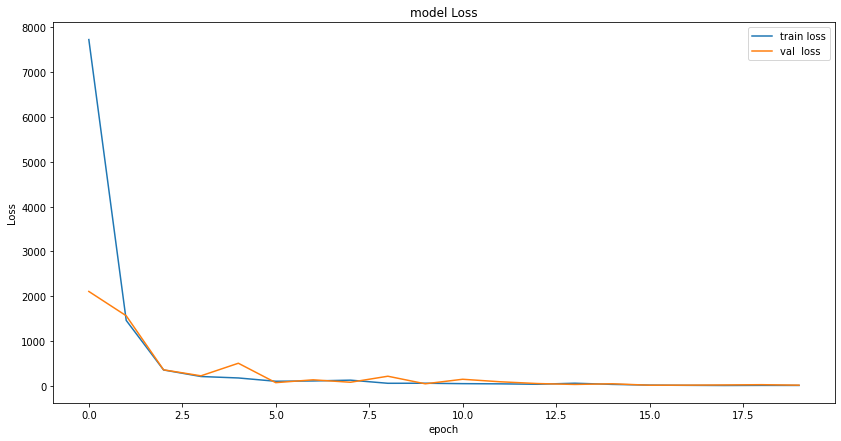

In [14]:
# import keras
# from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.figure(figsize=(14,7))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val  loss'], loc='upper right')
plt.show()

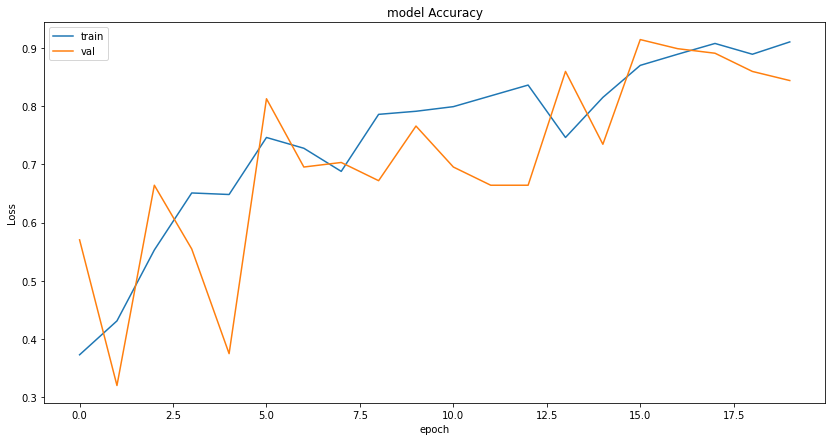

In [15]:
# import keras
# from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.figure(figsize=(14,7))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 224, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1605632)           0         
                                                                 
 dense (Dense)               (None, 100)               160563300 
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 160,563,923
Trainable params: 160,563,923
Non-trainable params: 0
__________________________________________

In [204]:
model.save("CNN_MARK2.h5")

In [17]:
y_predicted = model.predict(x_test)

In [33]:
y_predicted.shape

(32, 3)

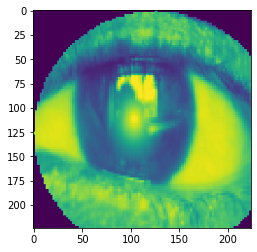

In [51]:
plt.imshow(x_test[23])

In [52]:
np.argmax(y_predicted[23])

0

In [61]:
# joblib.dump(model,"CNN_MARK1.joblib")

In [203]:
# model.save("cnn_mark_checkpoint_1")

In [60]:
# joblib.dump(model,"CNN_CHKPT.joblib")

In [4]:
restored_keras_model = tensorflow.keras.models.load_model("CNN_MARK2.h5")
restored_keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 224, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1605632)           0         
                                                                 
 dense (Dense)               (None, 100)               160563300 
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 160,563,923
Trainable params: 160,563,923
Non-trainable params: 0
__________________________________________

(224, 224, 1)

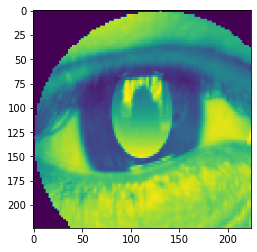

In [136]:
plt.imshow(x_test[0])
x_test[0].shape

In [ ]:
np.r

In [ ]:
restored_keras_model.predict()

In [76]:
image_gen = ImageDataGenerator()

image_generator_image = image_gen.flow_from_directory(
    "Dataset_Practice/MY_TEST"
    ,
    color_mode='grayscale',
    batch_size=32,
    class_mode = 'categorical',
    target_size=(224,224),
    seed=42 )

Found 0 images belonging to 0 classes.


In [78]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2

In [195]:
#function to preprocess normal image 
def prepocessImage(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    frame = img
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    sensitivity = 156
    lower_white = np.array([0,0,255-sensitivity])
    upper_white = np.array([255,sensitivity,255])
    # Threshold the HSV image to get only white colors
    mask = cv2.inRange(hsv, lower_white, upper_white)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    ret, thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)
    circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, 1.5, 100000,param1=80,param2=40,minRadius=0,maxRadius=0)
    x,y,r = 0,0,0
    if circles is not None:
      circles = np.uint16(np.around(circles))
      x,y,r = circles[0][0]
      x=int(x)
      y=int(y)
      r=int(r)
    mask = np.zeros((224,224), np.uint8)
    cv2.circle(mask,(x,y),r,(255,255,255),-1)
    masked_data = cv2.bitwise_and(frame, frame, mask=mask)
    _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
    cnt = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
    x,y,w,h = cv2.boundingRect(cnt[0])

    # Crop masked_data
    crop = masked_data[y:y+h,x:x+w]
    crop = cv2.resize(crop, (224,224), interpolation = cv2.INTER_AREA)
    #preprocess the image
    my_image = preprocess_input(crop)
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    my_image = img_to_array(crop)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    return my_image
    # preprocessed shape = (1,224,224,1)

In [199]:
my_image.shape

(1, 224, 224, 1)

In [196]:
# plt.imshow(my_image)

In [197]:
crop.shape

(224, 224)

In [198]:
z = image.img_to_array(crop)
z.shape

(224, 224, 1)

In [199]:
my_image.shape

(1, 224, 224, 1)

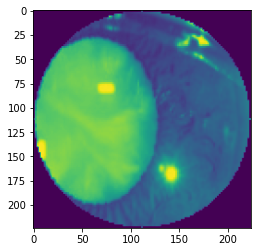

In [200]:
plt.imshow(crop)

In [ ]:
image.

In [92]:
from tensorflow.keras.preprocessing import image

In [169]:
my_test_image = image.load_img("MY_Image/MY_TEST/test_mark4.jpg",color_mode='grayscale',target_size=(224,224))

(224, 224, 1)

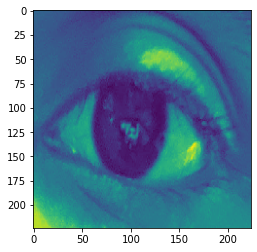

In [170]:
plt.imshow(my_test_image)
x = image.img_to_array(my_test_image)
x.shape

In [144]:
x = np.expand_dims(x, axis=0)

In [145]:
x.shape

(1, 224, 224, 1)

In [167]:
y_restore = restored_keras_model.predict(my_image)

In [168]:
np.argmax(y_restore)

0

In [201]:
y = model.predict(my_image)

In [202]:
np.argmax(y)

0

In [ ]:
#     "Dataset_Practice/MY_TEST"
#     ,
#     color_mode='grayscale',
#     batch_size=32,
#     class_mode = 'categorical',
#     target_size=(224,224),
#     seed=42 

In [206]:
# pip install sklearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=e9eae963f5d949c7f17d2502f069662d07d70fc5741755685f7512a5963ee21b
  Stored in directory: c:\users\cheta\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [217]:
from sklearn.metrics import classification_report

In [25]:
for i in range(len(y_test)):
    print("Tesy :"+str(y_tested[i]) +" : Predicted "+str(y_predicted[i]))

Tesy :2 : Predicted 2
Tesy :1 : Predicted 1
Tesy :0 : Predicted 0
Tesy :2 : Predicted 2
Tesy :0 : Predicted 0
Tesy :0 : Predicted 0
Tesy :1 : Predicted 1
Tesy :1 : Predicted 1
Tesy :2 : Predicted 2
Tesy :2 : Predicted 2
Tesy :2 : Predicted 2
Tesy :1 : Predicted 1
Tesy :1 : Predicted 1
Tesy :0 : Predicted 2
Tesy :2 : Predicted 2
Tesy :1 : Predicted 0
Tesy :0 : Predicted 0
Tesy :0 : Predicted 0
Tesy :2 : Predicted 2
Tesy :2 : Predicted 2
Tesy :0 : Predicted 1
Tesy :2 : Predicted 2
Tesy :1 : Predicted 1
Tesy :0 : Predicted 0
Tesy :2 : Predicted 2
Tesy :0 : Predicted 1
Tesy :2 : Predicted 2
Tesy :1 : Predicted 1
Tesy :0 : Predicted 0
Tesy :0 : Predicted 1
Tesy :0 : Predicted 0
Tesy :2 : Predicted 2


In [20]:
y_tested = [np.argmax(i) for i in y_test]


In [13]:
y_predicted = restored_keras_model.predict(x_test)

In [16]:
# for i in y_predicted:
#     print(i,np.argmax(i))

In [17]:
y_predicted = [np.argmax(i) for i in y_predicted]

In [18]:
for i in range(5):
    print(y_predicted[i])

2
1
0
2
0


In [212]:
y_predicted[4]

array([1.0000000e+00, 0.0000000e+00, 3.6716078e-28], dtype=float32)

In [27]:
from sklearn.metrics import classification_report,accuracy_score

In [30]:
print(accuracy_score(y_tested,y_predicted))

0.84375


In [28]:
print(classification_report(y_tested,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.70      0.88      0.78         8
           2       0.92      1.00      0.96        12

    accuracy                           0.84        32
   macro avg       0.84      0.85      0.83        32
weighted avg       0.85      0.84      0.84        32



In [221]:
res = scoring(y_target=y_tested, y_predicted=y_predicted, metric='error')
print(res)

NameError: name 'scoring' is not defined

In [222]:
from mlxtend.evaluate import scoring


ModuleNotFoundError: No module named 'mlxtend'